## 1 Load the dataset

In [1]:
!unzip -q '/content/archive.zip' -d '/content'

In [2]:
import os
print(os.listdir("/content"))
import warnings
warnings.filterwarnings('ignore')

['.config', 'archive.zip', 'IMDB Dataset.csv', 'sample_data']


In [3]:
#importing the training data
import pandas as pd
imdb_data=pd.read_csv('/content/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## 2 Pre-Processing of Raw Data

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [6]:
df = pd.DataFrame(imdb_data)
df.columns=['review','label']
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.describe()

,review,label
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
from nltk.corpus import stopwords
stopword_list=stopwords.words('english')

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [11]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [12]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{"you're", 'from', 'her', 'mustn', 'such', "mustn't", "wasn't", 'won', 'they', 'at', "hasn't", 'it', 'having', 'between', "don't", 'should', 'against', 'doing', 'of', 'now', 'while', 'than', "isn't", 'mightn', 'here', 'other', 'its', 'am', 'yourself', 'them', 'which', "didn't", 'who', 'to', 'aren', 'themselves', 'as', 'until', 'did', 'have', 'o', "mightn't", 'i', 'then', 'couldn', 'over', 't', 'myself', "shan't", 'she', 'through', 'be', 'been', 'yourselves', 'further', 'by', 'himself', 'after', 'off', 'where', 'once', 'on', 'if', 'these', 'shan', "should've", 'for', "doesn't", 'you', 'whom', 'so', 'under', 'didn', 's', 'me', 'were', 'theirs', 'too', 'ma', "it's", 'about', 'ain', 'or', 're', 'needn', 'but', 'yours', 'your', 'herself', 'itself', 'below', "couldn't", 'my', 'most', 'out', 'he', 'are', 'any', 'not', 'in', 'an', 'doesn', 'isn', 'shouldn', 'd', "won't", 'when', 'y', "needn't", 'ourselves', 'into', 'own', 'wasn', "haven't", 'what', 'nor', 'being', 'that', 'because', 'him', 'ha

In [13]:
df.head()

,review,label
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [14]:
df2 = df.copy()
df2.label[df2.label=="positive"] = 1
df2.label[df2.label=='negative'] = 0
df2.head()

,review,label
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically theres family little boy Jake thinks...,0
4,Petter Matteis Love Time Money visually stunni...,1


## 3 Split into Train-Valid-Test

In [15]:
np.random.seed(2020)
from sklearn.model_selection import train_test_split
X_tv, X_test, y_tv, y_test = train_test_split(df2['review'], df2['label'], test_size=0.15,random_state=0) # 15% data for testing

In [16]:
X_tv_c=X_tv.reset_index()
X_tv_c=X_tv_c.drop(['index'], axis=1)
y_tv_c = y_tv.reset_index()
y_tv_c = y_tv_c.drop(['index'], axis=1)
X_tv = X_tv_c['review']
y_tv = y_tv_c['label']

In [17]:
import numpy as np
from sklearn.model_selection import PredefinedSplit
index_valid = np.random.choice(range(len(X_tv_c)), int(len(X_tv_c)*15/85),replace=False)
index_train = [ele for ele in range(len(X_tv_c)) if ele not in index_valid]
split_index = [-1 if ele not in index_valid else 0 for ele in range(len(X_tv_c)) ]
pds = PredefinedSplit(test_fold=split_index)
X_train = X_tv_c.iloc[index_train]
y_train = y_tv_c.iloc[index_train]
X_valid = X_tv_c.iloc[index_valid]
y_valid = y_tv_c.iloc[index_valid]
X_train = X_train['review']
y_train = y_train['label']
X_valid = X_valid['review']
y_valid = y_valid['label']

In [ ]:
print(X_train.iloc[0])

Extremely poor action film starring ever wooden Dolph Lundgren Brandon Lee trapped sidekick role never seems gel action best average bit nudity chucked yes Tia Carrera use body double setup usual renegade cop forced break new partner big case makers least try give formula twist making Lundgren cop Oriental values Lee modern city slicker zero character development making almost comical Lundgrens oriental warrior outfit big showdown seen believed action sequences numbers Leewho would go make excellent Crow never given scope show particular martial arts brilliance given illustrious parentage must hell lot pressure far better served live father taking different role Crow showed unique actor may become tragic early deathUnless hardcore Lundgren fan fan poor 80s style action movies think Cobra etc avoidPoor 310


In [55]:
y_tv_int = y_tv.astype('int')
y_test_int = y_test.astype('int')

## Bag of Words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
# bag of words(2)
bag2_vectorizer = CountVectorizer(min_df=5, ngram_range=(2, 2), max_features=1000, lowercase=True)
bag2_fit = bag2_vectorizer.fit(X_train)

In [54]:
X_train_bag2 = bag2_fit.transform(X_train)
X_valid_bag2 = bag2_fit.transform(X_valid)
X_tv_bag2 = bag2_fit.transform(X_tv)
X_test_bag2 = bag2_fit.transform(X_test)

In [56]:
lr = LogisticRegression()
param_grid_lr = {'penalty':['l1','l2'],'dual':[True,False],'C':[0.1,0.2,0.5,1,3]}
bag2_lr = GridSearchCV(lr, param_grid_lr, cv = pds, n_jobs=100, scoring = 'roc_auc')
bag2_lr_fit = bag2_lr.fit(X_tv_bag2, y_tv_int)
bag2_lr_fit.best_params_

{'C': 0.5, 'dual': False, 'penalty': 'l2'}

In [58]:
bag2_lr_fit.best_score_

0.8296273731785246

In [57]:
bag2_lr_pred = bag2_lr_fit.predict(X_test_bag2)
res_bag2_lr_test = evaluate_pred(y_test_int, bag2_lr_pred)

TP = 2932
FP = 1071
FN = 772
TN = 2725
Accuracy = 0.754
Precision = 0.732
Recall = 0.792
Specificity = 0.718
False_Positive_Rate = 0.282
F1_Score = 0.761
Balanced_Accuracy = 0.725


In [59]:
# bag of words(3)
bag3_vectorizer = CountVectorizer(min_df=5, ngram_range=(3, 3), max_features=1000, lowercase=True)
bag3_fit = bag3_vectorizer.fit(X_train)
X_train_bag3 = bag3_fit.transform(X_train)
X_valid_bag3 = bag3_fit.transform(X_valid)
X_tv_bag3 = bag3_fit.transform(X_tv)
X_test_bag3 = bag3_fit.transform(X_test)
bag3_lr = GridSearchCV(lr, param_grid_lr, cv = pds, n_jobs=100, scoring = 'roc_auc')
bag3_lr_fit = bag3_lr.fit(X_tv_bag3, y_tv_int)
print(bag3_lr_fit.best_params_)
print(bag3_lr_fit.best_score_)
bag3_lr_pred = bag3_lr_fit.predict(X_test_bag3)
res_bag3_lr_test = evaluate_pred(y_test_int, bag3_lr_pred)

{'C': 0.2, 'dual': False, 'penalty': 'l2'}
0.675555520626135
TP = 3251
FP = 2418
FN = 453
TN = 1378
Accuracy = 0.617
Precision = 0.573
Recall = 0.878
Specificity = 0.363
False_Positive_Rate = 0.637
F1_Score = 0.693
Balanced_Accuracy = 0.468


## Ngram

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vectorizer = CountVectorizer(min_df=5, analyzer='char_wb', ngram_range=(5, 5), max_features=1000, lowercase=True)
ngram_fit = ngram_vectorizer.fit(X_train)

In [22]:
X_train_ngram = ngram_fit.transform(X_train)
X_valid_ngram = ngram_fit.transform(X_valid)
X_tv_ngram = ngram_fit.transform(X_tv)
X_test_ngram = ngram_fit.transform(X_test)

In [23]:
GramFrequency = pd.DataFrame({'Word': ngram_fit.get_feature_names(), 'Count': X_train_ngram.toarray().sum(axis=0)})
GramFrequency['Frequency'] = GramFrequency['Count'] / GramFrequency['Count'].sum()
GramFrequency.head()

,Word,Count,Frequency
0,acti,14047,0.002143
1,acto,9388,0.001433
2,actu,7060,0.001077
3,almo,4356,0.000665
4,alon,4133,0.000631


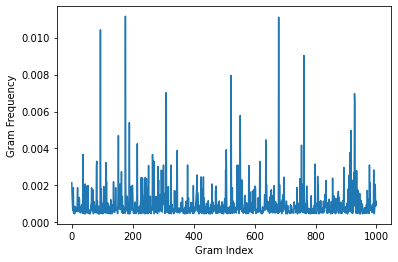

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(GramFrequency.Frequency)
plt.xlabel('Gram Index')
plt.ylabel('Gram Frequency')
plt.show()

In [25]:
GramFrequency_sort = GramFrequency.sort_values(by='Frequency', ascending=False)
GramFrequency_sort.head()

,Word,Count,Frequency
176,movi,73116,0.011157
679,movie,72767,0.011104
94,film,68284,0.010420
762,ovie,59168,0.009029
523,film,52128,0.007954


In [26]:
# ngram+logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid_lr = {'penalty':['l1','l2'],'dual':[True,False],'C':[0.1,0.2,0.5,1,3]}
ngram_lr = GridSearchCV(lr, param_grid_lr, cv = pds, n_jobs=100, scoring = 'roc_auc')
ngram_lr_fit = ngram_lr.fit(X_tv_ngram, y_tv_int)
ngram_lr_fit.best_params_

{'C': 0.1, 'dual': False, 'penalty': 'l2'}

In [ ]:
ngram_lr_fit.best_score_

0.9105943706370774

In [27]:
def evaluate_pred(ytrue, ypred):
  TN, FP, FN, TP = confusion_matrix(ytrue, ypred).ravel()
  Accuracy = round((TP + TN)/(TP + TN + FP + FN),3)
  Precision = round(TP/(TP + FP),3)
  Recall = round(TP/(TP + FN),3)
  Specificity = round(TN/(TN + FP),3)
  FPR = round(FP/(FP + TN),3)
  F1 = round(2*(Precision * Recall)/(Precision + Recall),3)
  Balanced_Accuracy = round((Precision + Specificity)/2,3)
  print("TP = "+str(TP))
  print("FP = "+str(FP))
  print("FN = "+str(FN))
  print("TN = "+str(TN))
  print("Accuracy = "+str(Accuracy))
  print("Precision = "+str(Precision))
  print("Recall = "+str(Recall))
  print("Specificity = "+str(Specificity))
  print("False_Positive_Rate = "+str(FPR))
  print("F1_Score = "+str(F1))
  print("Balanced_Accuracy = "+str(Balanced_Accuracy))
  res=pd.DataFrame([TN, FP, FN, TP, Accuracy, Precision, Recall, Specificity, FPR, F1, Balanced_Accuracy])
  return(res)

In [29]:
ngram_lr_pred = ngram_lr_fit.predict(X_test_ngram)
res_ngram_lr_test=evaluate_pred(y_test_int, ngram_lr_pred)

TP = 3168
FP = 647
FN = 536
TN = 3149
Accuracy = 0.842
Precision = 0.83
Recall = 0.855
Specificity = 0.83
False_Positive_Rate = 0.17
F1_Score = 0.842
Balanced_Accuracy = 0.83


In [30]:
# ngram+svm
from sklearn.svm import LinearSVC

svm = LinearSVC()
param_grid_svm = {"C":[0.2,0.5,1],'loss':['hinge','squared_hinge'],'class_weight':[{1:4}]}
ngram_svm = GridSearchCV(svm,param_grid_svm,cv=pds,n_jobs=100,scoring = 'roc_auc')
ngram_svm_fit = ngram_svm.fit(X_tv_ngram, y_tv_int)
ngram_svm_fit.best_params_


{'C': 0.2, 'class_weight': {1: 4}, 'loss': 'squared_hinge'}

In [ ]:
ngram_svm_fit.best_score_

In [31]:
ngram_svm_pred = ngram_svm_fit.predict(X_test_ngram)
res_ngram_svm_test=evaluate_pred(y_test_int, ngram_svm_pred)

TP = 3540
FP = 1439
FN = 164
TN = 2357
Accuracy = 0.786
Precision = 0.711
Recall = 0.956
Specificity = 0.621
False_Positive_Rate = 0.379
F1_Score = 0.815
Balanced_Accuracy = 0.666


In [ ]:
# ngram+cnn (keras)
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

embedding_dim = 200
vocab_size=1000

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X_train_ngram.shape[1]))
model.add(Conv1D(filters=40, kernel_size=8, padding='same', activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.30))
model.add(Flatten())
#model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1000, 200)         200000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1000, 40)          64040     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 40)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 250, 40)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 20002     
Total params: 284,042
Trainable params: 284,042
Non-trainable params: 0
________________________________________________

In [ ]:
y_train_int = y_train.astype('int')
y_valid_int = y_valid.astype('int')
model.fit(X_train_ngram.toarray(), y_train_int, batch_size=50, epochs = 3, validation_data = (X_valid_ngram.toarray(),y_valid_int))

Epoch 1/3
700/700 [==============================] - 442s 632ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 2/3
700/700 [==============================] - 441s 630ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 3/3
700/700 [==============================] - 441s 630ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5056


In [ ]:
# ngram+LSTM (keras)
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
embed_dim = 400
lstm_out = 1

# Model saving callback
model = Sequential()
model.add(Embedding(1000, embed_dim, input_length = X_train_ngram.shape[1]))
model.add(LSTM(lstm_out, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1000, 400)         400000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1)                 1608      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 401,610
Trainable params: 401,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_data = (X_valid_ngram.toarray(), y_valid_int)
len(validation_data)

2

In [ ]:
batch_size = 50
history = model.fit(X_train_ngram.toarray(), y_train_int, epochs=3, batch_size=batch_size, validation_data = (X_valid_ngram.toarray(), y_valid_int))

Epoch 1/3
700/700 [==============================] - 1212s 2s/step - loss: 7.6259 - accuracy: 0.4999 - val_loss: 7.5250 - val_accuracy: 0.5065
Epoch 2/3
700/700 [==============================] - 1212s 2s/step - loss: 7.6259 - accuracy: 0.4999 - val_loss: 7.5250 - val_accuracy: 0.5065
Epoch 3/3
700/700 [==============================] - 1226s 2s/step - loss: 7.6259 - accuracy: 0.4999 - val_loss: 7.5250 - val_accuracy: 0.5065


## Test the Fairness

In [33]:
# runtime_1_100 data
runtime1_data=pd.read_csv('/content/runtime_1_100.csv')
print(runtime1_data.shape)
runtime1_df = pd.DataFrame(runtime1_data)
runtime1_review = runtime1_df['user_review']
runtime1_label = runtime1_df['sentiment']
runtime1_df.head()

runtime1_review = runtime1_review.apply(denoise_text)
runtime1_review = runtime1_review.apply(remove_special_characters)
runtime1_review = runtime1_review.apply(remove_stopwords)
print(runtime1_review[:5])

runtime1_label[runtime1_label=="positive"] = 1
runtime1_label[runtime1_label=='negative'] = 0
print(runtime1_label[:5])

(500, 3)
0    movie russian propaganda mean movie alot fake ...
1    better job explaining expo could Seriously goo...
2    im honestly writing high score 2 rave reviews ...
3    first thing need know film low budget funded k...
4    one worst high rated movies Ive ever seen Made...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object


In [35]:
runtime1_ngram = ngram_fit.transform(runtime1_review)
runtime1_label = runtime1_label.astype('int')

# predict using logistic
runtime1_lr_pred = ngram_lr_fit.predict(runtime1_ngram)
runtime1_lr_test = evaluate_pred(runtime1_label, runtime1_lr_pred)

# predict using svm
runtime1_svm_pred = ngram_svm_fit.predict(runtime1_ngram)
runtime1_svm_test = evaluate_pred(runtime1_label, runtime1_svm_pred)

TP = 180
FP = 84
FN = 70
TN = 166
Accuracy = 0.692
Precision = 0.682
Recall = 0.72
Specificity = 0.664
False_Positive_Rate = 0.336
F1_Score = 0.7
Balanced_Accuracy = 0.673
TP = 209
FP = 124
FN = 41
TN = 126
Accuracy = 0.67
Precision = 0.628
Recall = 0.836
Specificity = 0.504
False_Positive_Rate = 0.496
F1_Score = 0.717
Balanced_Accuracy = 0.566


In [36]:
# runtime_101_600 data
runtime2_data=pd.read_csv('/content/runtime_101_600.csv')
print(runtime2_data.shape)
runtime2_df = pd.DataFrame(runtime2_data)
runtime2_review = runtime2_df['user_review']
runtime2_label = runtime2_df['sentiment']
runtime2_df.head()

runtime2_review = runtime2_review.apply(denoise_text)
runtime2_review = runtime2_review.apply(remove_special_characters)
runtime2_review = runtime2_review.apply(remove_stopwords)
print(runtime2_review[:5])

runtime2_label[runtime2_label=="positive"] = 1
runtime2_label[runtime2_label=='negative'] = 0
print(runtime2_label[:5])

(500, 3)
0    MSG youre planning boost confidence trying com...
1    MSGThe Messenger emerged social reforming movi...
2    another typical one man taking hundreds goons ...
3    reason saying must watch least seeing movie im...
4    usual story usual action sequences major disap...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object


In [37]:
runtime2_ngram = ngram_fit.transform(runtime2_review)
runtime2_label = runtime2_label.astype('int')

# predict using logistic
runtime2_lr_pred = ngram_lr_fit.predict(runtime2_ngram)
runtime2_lr_test = evaluate_pred(runtime2_label, runtime2_lr_pred)

# predict using svm
runtime2_svm_pred = ngram_svm_fit.predict(runtime2_ngram)
runtime2_svm_test = evaluate_pred(runtime2_label, runtime2_svm_pred)

TP = 198
FP = 98
FN = 52
TN = 152
Accuracy = 0.7
Precision = 0.669
Recall = 0.792
Specificity = 0.608
False_Positive_Rate = 0.392
F1_Score = 0.725
Balanced_Accuracy = 0.639
TP = 225
FP = 139
FN = 25
TN = 111
Accuracy = 0.672
Precision = 0.618
Recall = 0.9
Specificity = 0.444
False_Positive_Rate = 0.556
F1_Score = 0.733
Balanced_Accuracy = 0.531


In [38]:
# action data
action_data=pd.read_csv('/content/action.csv')
print(action_data.shape)
action_df = pd.DataFrame(action_data)
action_review = action_df['user_review']
action_label = action_df['sentiment']
action_df.head()

action_review = action_review.apply(denoise_text)
action_review = action_review.apply(remove_special_characters)
action_review = action_review.apply(remove_stopwords)
print(action_review[:5])

action_label[action_label=="positive"] = 1
action_label[action_label=='negative'] = 0
print(action_label[:5])

(500, 3)
0    movie russian propaganda mean movie alot fake ...
1    better job explaining expo could Seriously goo...
2    MSG youre planning boost confidence trying com...
3    MSGThe Messenger emerged social reforming movi...
4    another typical one man taking hundreds goons ...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object


In [39]:
action_ngram = ngram_fit.transform(action_review)
action_label = action_label.astype('int')

# predict using logistic
action_lr_pred = ngram_lr_fit.predict(action_ngram)
action_lr_test = evaluate_pred(action_label, action_lr_pred)

# predict using svm
action_svm_pred = ngram_svm_fit.predict(action_ngram)
action_svm_test = evaluate_pred(action_label, action_svm_pred)

TP = 183
FP = 74
FN = 67
TN = 176
Accuracy = 0.718
Precision = 0.712
Recall = 0.732
Specificity = 0.704
False_Positive_Rate = 0.296
F1_Score = 0.722
Balanced_Accuracy = 0.708
TP = 215
FP = 125
FN = 35
TN = 125
Accuracy = 0.68
Precision = 0.632
Recall = 0.86
Specificity = 0.5
False_Positive_Rate = 0.5
F1_Score = 0.729
Balanced_Accuracy = 0.566


In [40]:
# adventure data
adventure_data=pd.read_csv('/content/adventure.csv')
print(adventure_data.shape)
adventure_df = pd.DataFrame(adventure_data)
adventure_review = adventure_df['user_review']
adventure_label = adventure_df['sentiment']
adventure_df.head()

adventure_review = adventure_review.apply(denoise_text)
adventure_review = adventure_review.apply(remove_special_characters)
adventure_review = adventure_review.apply(remove_stopwords)
print(adventure_review[:5])

adventure_label[adventure_label=="positive"] = 1
adventure_label[adventure_label=='negative'] = 0
print(adventure_label[:5])

(500, 3)
0    due respect Nawazs acting man Dashrath Manjhi ...
1    Expect grandeur unBollywoodlike plot movie unf...
2    Go Goa Gone truly one hilarious Hindi films si...
3    rarity Indian movies step beyond conventionala...
4    Worst movie Ive ever seen watched jiu jitsu ab...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object


In [41]:
adventure_ngram = ngram_fit.transform(adventure_review)
adventure_label = adventure_label.astype('int')

# predict using logistic
adventure_lr_pred = ngram_lr_fit.predict(adventure_ngram)
adventure_lr_test = evaluate_pred(adventure_label, adventure_lr_pred)

# predict using svm
adventure_svm_pred = ngram_svm_fit.predict(adventure_ngram)
adventure_svm_test = evaluate_pred(adventure_label, adventure_svm_pred)

TP = 193
FP = 90
FN = 57
TN = 160
Accuracy = 0.706
Precision = 0.682
Recall = 0.772
Specificity = 0.64
False_Positive_Rate = 0.36
F1_Score = 0.724
Balanced_Accuracy = 0.661
TP = 222
FP = 128
FN = 28
TN = 122
Accuracy = 0.688
Precision = 0.634
Recall = 0.888
Specificity = 0.488
False_Positive_Rate = 0.512
F1_Score = 0.74
Balanced_Accuracy = 0.561


In [43]:
# animation data
animation_data=pd.read_csv('/content/animation.csv')
print(animation_data.shape)
animation_df = pd.DataFrame(animation_data)
animation_review = animation_df['user_review']
animation_label = animation_df['sentiment']
animation_df.head()

animation_review = animation_review.apply(denoise_text)
animation_review = animation_review.apply(remove_special_characters)
animation_review = animation_review.apply(remove_stopwords)
print(animation_review[:5])

animation_label[animation_label=="positive"] = 1
animation_label[animation_label=='negative'] = 0
print(animation_label[:5])

(232, 3)
0    OK make clear guys reviewed gave 9 10 arent DB...
1    Finally days came true new Dragon Ball Z Movie...
2    big fan original Asterix comic books kid Still...
3    everything movie Asterix beThe spirit found Ud...
4    review nothing spoilers Read dont please dont ...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object


In [44]:
animation_ngram = ngram_fit.transform(animation_review)
animation_label = animation_label.astype('int')

# predict using logistic
animation_lr_pred = ngram_lr_fit.predict(animation_ngram)
animation_lr_test = evaluate_pred(animation_label, animation_lr_pred)

# predict using svm
animation_svm_pred = ngram_svm_fit.predict(animation_ngram)
animation_svm_test = evaluate_pred(animation_label, animation_svm_pred)

TP = 101
FP = 50
FN = 15
TN = 66
Accuracy = 0.72
Precision = 0.669
Recall = 0.871
Specificity = 0.569
False_Positive_Rate = 0.431
F1_Score = 0.757
Balanced_Accuracy = 0.619
TP = 111
FP = 78
FN = 5
TN = 38
Accuracy = 0.642
Precision = 0.587
Recall = 0.957
Specificity = 0.328
False_Positive_Rate = 0.672
F1_Score = 0.728
Balanced_Accuracy = 0.458


In [45]:
# biography data
biography_data=pd.read_csv('/content/biography.csv')
print(biography_data.shape)
biography_df = pd.DataFrame(biography_data)
biography_review = biography_df['user_review']
biography_label = biography_df['sentiment']
biography_df.head()

biography_review = biography_review.apply(denoise_text)
biography_review = biography_review.apply(remove_special_characters)
biography_review = biography_review.apply(remove_stopwords)
print(biography_review[:5])

biography_label[biography_label=="positive"] = 1
biography_label[biography_label=='negative'] = 0
print(biography_label[:5])

biography_ngram = ngram_fit.transform(biography_review)
biography_label = biography_label.astype('int')

# predict using logistic
biography_lr_pred = ngram_lr_fit.predict(biography_ngram)
biography_lr_test = evaluate_pred(biography_label, biography_lr_pred)

# predict using svm
biography_svm_pred = ngram_svm_fit.predict(biography_ngram)
biography_svm_test = evaluate_pred(biography_label, biography_svm_pred)

(462, 4)
0    movie trying pass biopic fairy tale trying rew...
1    speechless movie watch starts main character d...
2    due respect Nawazs acting man Dashrath Manjhi ...
3    Expect grandeur unBollywoodlike plot movie unf...
4    Usually biography written death resignation ma...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object
TP = 193
FP = 118
FN = 38
TN = 113
Accuracy = 0.662
Precision = 0.621
Recall = 0.835
Specificity = 0.489
False_Positive_Rate = 0.511
F1_Score = 0.712
Balanced_Accuracy = 0.555
TP = 217
FP = 167
FN = 14
TN = 64
Accuracy = 0.608
Precision = 0.565
Recall = 0.939
Specificity = 0.277
False_Positive_Rate = 0.723
F1_Score = 0.705
Balanced_Accuracy = 0.421


In [46]:
# comedy data
comedy_data=pd.read_csv('/content/comedy.csv')
print(comedy_data.shape)
comedy_df = pd.DataFrame(comedy_data)
comedy_review = comedy_df['user_review']
comedy_label = comedy_df['sentiment']
comedy_df.head()

comedy_review = comedy_review.apply(denoise_text)
comedy_review = comedy_review.apply(remove_special_characters)
comedy_review = comedy_review.apply(remove_stopwords)
print(comedy_review[:5])

comedy_label[comedy_label=="positive"] = 1
comedy_label[comedy_label=='negative'] = 0
print(comedy_label[:5])

comedy_ngram = ngram_fit.transform(comedy_review)
comedy_label = comedy_label.astype('int')

# predict using logistic
comedy_lr_pred = ngram_lr_fit.predict(comedy_ngram)
comedy_lr_test = evaluate_pred(comedy_label, comedy_lr_pred)

# predict using svm
comedy_svm_pred = ngram_svm_fit.predict(comedy_ngram)
comedy_svm_test = evaluate_pred(comedy_label, comedy_svm_pred)

(500, 3)
0    MSG youre planning boost confidence trying com...
1    MSGThe Messenger emerged social reforming movi...
2    Recep Ivedik example cinematic parasitism prod...
3    waste time recommend watch movie best Recep Iv...
4    One worst movies ever seen Deserved zero ratin...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object
TP = 199
FP = 94
FN = 51
TN = 156
Accuracy = 0.71
Precision = 0.679
Recall = 0.796
Specificity = 0.624
False_Positive_Rate = 0.376
F1_Score = 0.733
Balanced_Accuracy = 0.652
TP = 229
FP = 137
FN = 21
TN = 113
Accuracy = 0.684
Precision = 0.626
Recall = 0.916
Specificity = 0.452
False_Positive_Rate = 0.548
F1_Score = 0.744
Balanced_Accuracy = 0.539


In [47]:
# horror data
horror_data=pd.read_csv('/content/horror.csv')
print(horror_data.shape)
horror_df = pd.DataFrame(horror_data)
horror_review = horror_df['user_review']
horror_label = horror_df['sentiment']
horror_df.head()

horror_review = horror_review.apply(denoise_text)
horror_review = horror_review.apply(remove_special_characters)
horror_review = horror_review.apply(remove_stopwords)
print(horror_review[:5])

horror_label[horror_label=="positive"] = 1
horror_label[horror_label=='negative'] = 0
print(horror_label[:5])

horror_ngram = ngram_fit.transform(horror_review)
horror_label = horror_label.astype('int')

# predict using logistic
horror_lr_pred = ngram_lr_fit.predict(horror_ngram)
horror_lr_test = evaluate_pred(horror_label, horror_lr_pred)

# predict using svm
horror_svm_pred = ngram_svm_fit.predict(horror_ngram)
horror_svm_test = evaluate_pred(horror_label, horror_svm_pred)

(500, 3)
0    im honestly writing high score 2 rave reviews ...
1    first thing need know film low budget funded k...
2    Go Goa Gone truly one hilarious Hindi films si...
3    rarity Indian movies step beyond conventionala...
4    Never rate movie 1 reason movie ability rate z...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object
TP = 175
FP = 51
FN = 75
TN = 199
Accuracy = 0.748
Precision = 0.774
Recall = 0.7
Specificity = 0.796
False_Positive_Rate = 0.204
F1_Score = 0.735
Balanced_Accuracy = 0.785
TP = 213
FP = 96
FN = 37
TN = 154
Accuracy = 0.734
Precision = 0.689
Recall = 0.852
Specificity = 0.616
False_Positive_Rate = 0.384
F1_Score = 0.762
Balanced_Accuracy = 0.652


In [48]:
# romance data
romance_data=pd.read_csv('/content/romance.csv')
print(romance_data.shape)
romance_df = pd.DataFrame(romance_data)
romance_review = romance_df['user_review']
romance_label = romance_df['sentiment']
romance_df.head()

romance_review = romance_review.apply(denoise_text)
romance_review = romance_review.apply(remove_special_characters)
romance_review = romance_review.apply(remove_stopwords)
print(romance_review[:5])

romance_label[romance_label=="positive"] = 1
romance_label[romance_label=='negative'] = 0
print(romance_label[:5])

romance_ngram = ngram_fit.transform(romance_review)
romance_label = romance_label.astype('int')

# predict using logistic
romance_lr_pred = ngram_lr_fit.predict(romance_ngram)
romance_lr_test = evaluate_pred(romance_label, romance_lr_pred)

# predict using svm
romance_svm_pred = ngram_svm_fit.predict(romance_ngram)
romance_svm_test = evaluate_pred(romance_label, romance_svm_pred)

(500, 3)
0    Well dont know state without sounding like pes...
1    go back time times never even heard movie go b...
2    dont know Marathi mistake gone wrong screen co...
3    review film attempt explain things watch film ...
4    typical Bollywood clichguy falls love dancing ...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object
TP = 208
FP = 113
FN = 42
TN = 137
Accuracy = 0.69
Precision = 0.648
Recall = 0.832
Specificity = 0.548
False_Positive_Rate = 0.452
F1_Score = 0.729
Balanced_Accuracy = 0.598
TP = 231
FP = 161
FN = 19
TN = 89
Accuracy = 0.64
Precision = 0.589
Recall = 0.924
Specificity = 0.356
False_Positive_Rate = 0.644
F1_Score = 0.719
Balanced_Accuracy = 0.472


In [49]:
# scifi data
scifi_data=pd.read_csv('/content/scifi.csv')
print(scifi_data.shape)
scifi_df = pd.DataFrame(scifi_data)
scifi_review = scifi_df['user_review']
scifi_label = scifi_df['sentiment']
scifi_df.head()

scifi_review = scifi_review.apply(denoise_text)
scifi_review = scifi_review.apply(remove_special_characters)
scifi_review = scifi_review.apply(remove_stopwords)
print(scifi_review[:5])

scifi_label[scifi_label=="positive"] = 1
scifi_label[scifi_label=='negative'] = 0
print(scifi_label[:5])

scifi_ngram = ngram_fit.transform(scifi_review)
scifi_label = scifi_label.astype('int')

# predict using logistic
scifi_lr_pred = ngram_lr_fit.predict(scifi_ngram)
scifi_lr_test = evaluate_pred(scifi_label, scifi_lr_pred)

# predict using svm
scifi_svm_pred = ngram_svm_fit.predict(scifi_ngram)
scifi_svm_test = evaluate_pred(scifi_label, scifi_svm_pred)

(500, 3)
0    im honestly writing high score 2 rave reviews ...
1    first thing need know film low budget funded k...
2    seeing rating currently 70 although suspect ch...
3    sounded good started OK got awfulI watched end...
4    Go Goa Gone truly one hilarious Hindi films si...
Name: user_review, dtype: object
0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: object
TP = 171
FP = 61
FN = 79
TN = 189
Accuracy = 0.72
Precision = 0.737
Recall = 0.684
Specificity = 0.756
False_Positive_Rate = 0.244
F1_Score = 0.71
Balanced_Accuracy = 0.746
TP = 199
FP = 105
FN = 51
TN = 145
Accuracy = 0.688
Precision = 0.655
Recall = 0.796
Specificity = 0.58
False_Positive_Rate = 0.42
F1_Score = 0.719
Balanced_Accuracy = 0.617


In [51]:
res_ngram_lr=pd.concat([res_ngram_lr_test, runtime1_lr_test, runtime2_lr_test, action_lr_test, adventure_lr_test, animation_lr_test, biography_lr_test, comedy_lr_test, horror_lr_test, romance_lr_test, scifi_lr_test], axis=1, ignore_index=True)
res_ngram_lr.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_ngram_lr.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']
res_ngram_lr

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,3149.000,166.000,152.000,176.000,160.000,66.000,113.000,156.000,199.000,137.000,189.000
FP,647.000,84.000,98.000,74.000,90.000,50.000,118.000,94.000,51.000,113.000,61.000
FN,536.000,70.000,52.000,67.000,57.000,15.000,38.000,51.000,75.000,42.000,79.000
TP,3168.000,180.000,198.000,183.000,193.000,101.000,193.000,199.000,175.000,208.000,171.000
Accuracy,0.842,0.692,0.700,0.718,0.706,0.720,0.662,0.710,0.748,0.690,0.720
Precision,0.830,0.682,0.669,0.712,0.682,0.669,0.621,0.679,0.774,0.648,0.737
Recall,0.855,0.720,0.792,0.732,0.772,0.871,0.835,0.796,0.700,0.832,0.684
Specificity,0.830,0.664,0.608,0.704,0.640,0.569,0.489,0.624,0.796,0.548,0.756
FPR,0.170,0.336,0.392,0.296,0.360,0.431,0.511,0.376,0.204,0.452,0.244
F1,0.842,0.700,0.725,0.722,0.724,0.757,0.712,0.733,0.735,0.729,0.710


In [52]:
res_ngram_svm=pd.concat([res_ngram_svm_test, runtime1_svm_test, runtime2_svm_test, action_svm_test, adventure_svm_test, animation_svm_test, biography_svm_test, comedy_svm_test, horror_svm_test, romance_svm_test, scifi_svm_test], axis=1, ignore_index=True)
res_ngram_svm.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_ngram_svm.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']
res_ngram_svm

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,2357.000,126.000,111.000,125.000,122.000,38.000,64.000,113.000,154.000,89.000,145.000
FP,1439.000,124.000,139.000,125.000,128.000,78.000,167.000,137.000,96.000,161.000,105.000
FN,164.000,41.000,25.000,35.000,28.000,5.000,14.000,21.000,37.000,19.000,51.000
TP,3540.000,209.000,225.000,215.000,222.000,111.000,217.000,229.000,213.000,231.000,199.000
Accuracy,0.786,0.670,0.672,0.680,0.688,0.642,0.608,0.684,0.734,0.640,0.688
Precision,0.711,0.628,0.618,0.632,0.634,0.587,0.565,0.626,0.689,0.589,0.655
Recall,0.956,0.836,0.900,0.860,0.888,0.957,0.939,0.916,0.852,0.924,0.796
Specificity,0.621,0.504,0.444,0.500,0.488,0.328,0.277,0.452,0.616,0.356,0.580
FPR,0.379,0.496,0.556,0.500,0.512,0.672,0.723,0.548,0.384,0.644,0.420
F1,0.815,0.717,0.733,0.729,0.740,0.728,0.705,0.744,0.762,0.719,0.719
